In [257]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [258]:
obesity_rates = pd.read_csv('obesity_rates1.csv')

In [259]:
obesity_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   obesity_rates_new     151 non-null    float64
 1   total_budget          151 non-null    int64  
 2   clean_air             151 non-null    int64  
 3   clean_environ         151 non-null    int64  
 4   health_training       151 non-null    int64  
 5   school_awareness      151 non-null    int64  
 6   media_awareness       151 non-null    int64  
 7   sub_counselling       151 non-null    int64  
 8   log_clean_air         151 non-null    float64
 9   log_clean_environ     151 non-null    float64
 10  log_health_training   151 non-null    float64
 11  log_school_awareness  151 non-null    float64
 12  log_media_awareness   151 non-null    float64
 13  log_sub_counselling   151 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 16.6 KB


In [260]:
#obesity_rates_numeric = pd.get_dummies(obesity_rates)

In [261]:
# check out the new dataFrame
#obesity_rates_numeric.info()

In [262]:
#转化成df
csv_file = "obesity_rates1.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)#防止弹出警告
csv_df = pd.DataFrame(csv_data)
#print(csv_df)

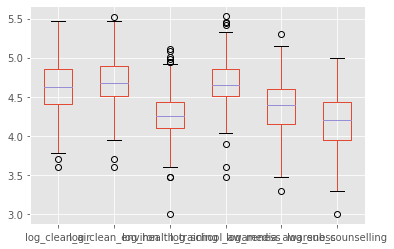

In [263]:
boxplot = csv_data.boxplot(column=['log_clean_air', 
                                   'log_clean_environ', 
                                   'log_health_training', 
                                   'log_school_awareness',
                                   'log_media_awareness', 
                                   'log_sub_counselling'])

In [264]:
csv_df.describe()

,obesity_rates_new,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,log_clean_air,log_clean_environ,log_health_training,log_school_awareness,log_media_awareness,log_sub_counselling
count,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000
mean,0.0035,"272,086.0927","59,761.5894","68,880.7947","25,278.1457","63,033.1126","33,185.4305","21,947.0199",4.6381,4.7011,4.2706,4.6781,4.3811,4.1977
std,0.0014,"210,015.1087","53,941.7845","62,069.0935","22,798.5844","55,015.5635","29,908.1715","19,818.1022",0.3463,0.3477,0.3393,0.3270,0.3527,0.3612
min,0.0010,"50,000.0000","4,000.0000","4,000.0000","1,000.0000","3,000.0000","2,000.0000","1,000.0000",3.6000,3.6000,3.0000,3.4800,3.3000,3.0000
25%,0.0026,"140,500.0000","26,000.0000","32,000.0000","12,500.0000","32,000.0000","14,000.0000","9,000.0000",4.4100,4.5100,4.0950,4.5100,4.1500,3.9500
50%,0.0032,"200,000.0000","42,000.0000","48,000.0000","18,000.0000","45,000.0000","25,000.0000","16,000.0000",4.6200,4.6800,4.2600,4.6500,4.4000,4.2000
75%,0.0041,"304,500.0000","70,000.0000","79,000.0000","27,000.0000","70,500.0000","40,500.0000","27,500.0000",4.8500,4.9000,4.4300,4.8500,4.6050,4.4400
max,0.0087,"1,170,000.0000","297,000.0000","333,000.0000","130,000.0000","340,000.0000","203,000.0000","99,000.0000",5.4700,5.5200,5.1100,5.5300,5.3100,5.0000


In [312]:
#去air
Q1 = csv_df.log_clean_air.quantile(0.25)
Q3 = csv_df.log_clean_air.quantile(0.75)
Q1, Q3

(4.41, 4.85)

In [313]:
IQR = Q3 - Q1
IQR

0.4399999999999995

In [317]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.750000000000001, 5.509999999999999)

In [318]:
df_no_1 = csv_df[(csv_df.log_clean_air>=lower_limit) & (csv_df.log_clean_air<upper_limit)]
#df_no_1

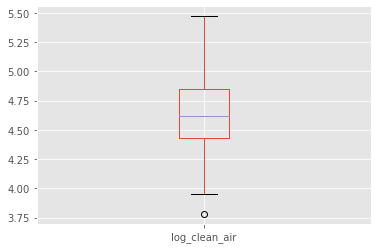

In [316]:
boxplot = df_no_1.boxplot(column=['log_clean_air'])

In [269]:
#去environ
Q1 = df_no_1.log_clean_environ.quantile(0.25)
Q3 = df_no_1.log_clean_environ.quantile(0.75)
Q1, Q3

(4.51, 4.9)

In [270]:
IQR = Q3 - Q1
IQR

0.39000000000000057

In [271]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.924999999999999, 5.485000000000001)

In [272]:
df_no_2 = df_no_1[(df_no_1.log_clean_environ>=lower_limit) & (df_no_1.log_clean_environ<=upper_limit)]
#df_no_2

In [273]:
#去health
Q1 = df_no_2.log_health_training.quantile(0.25)
Q3 = df_no_2.log_health_training.quantile(0.75)
Q1, Q3

(4.11, 4.44)

In [274]:
IQR = Q3 - Q1
IQR

0.33000000000000007

In [275]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.615, 4.9350000000000005)

In [234]:
df_no_3 = df_no_2[(df_no_2.log_health_training>=lower_limit) & (df_no_2.log_health_training<=upper_limit)]
#df_no_3

In [276]:
#去school
Q1 = df_no_2.log_school_awareness.quantile(0.25)
Q3 = df_no_2.log_school_awareness.quantile(0.75)
Q1, Q3

(4.51, 4.855)

In [277]:
IQR = Q3 - Q1
IQR

0.34500000000000064

In [278]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.992499999999999, 5.372500000000001)

In [280]:
df_no_4 = df_no_3[(df_no_3.log_school_awareness>=lower_limit) & (df_no_3.log_school_awareness<=upper_limit)]
#df_no_4

In [289]:
#去media
Q1 = df_no_4.log_media_awareness.quantile(0.25)
Q3 = df_no_4.log_media_awareness.quantile(0.75)
Q1, Q3

(4.15, 4.525)

In [290]:
IQR = Q3 - Q1
IQR

0.375

In [291]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.5875000000000004, 5.0875)

In [292]:
#df_no_5 = df_no_4[(df_no_4.log_media_awareness>=lower_limit) & (df_no_5.log_media_awareness<=upper_limit)]
#df_no_5

In [293]:
#去最后一个
Q1 = df_no_5.log_sub_counselling.quantile(0.25)
Q3 = df_no_5.log_sub_counselling.quantile(0.75)
Q1, Q3

(3.95, 4.32)

In [294]:
IQR = Q3 - Q1
IQR

0.3700000000000001

In [295]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.395, 4.875)

In [296]:
df_no_6 = df_no_5[(df_no_5.log_sub_counselling>=lower_limit) & (df_no_5.log_sub_counselling<=upper_limit)]
df_no_6

,obesity_rates_new,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,log_clean_air,log_clean_environ,log_health_training,log_school_awareness,log_media_awareness,log_sub_counselling
0,0.0042,139000,21000,22000,18000,41000,18000,19000,4.3200,4.3400,4.2600,4.6100,4.2600,4.2800
1,0.0022,220000,50000,17000,23000,74000,30000,26000,4.7000,4.2300,4.3600,4.8700,4.4800,4.4100
2,0.0020,160000,41000,45000,5000,26000,29000,14000,4.6100,4.6500,3.7000,4.4100,4.4600,4.1500
3,0.0026,161000,33000,42000,19000,50000,10000,7000,4.5200,4.6200,4.2800,4.7000,4.0000,3.8500
5,0.0029,199000,72000,27000,14000,64000,15000,7000,4.8600,4.4300,4.1500,4.8100,4.1800,3.8500
7,0.0068,91000,15000,16000,13000,21000,18000,8000,4.1800,4.2000,4.1100,4.3200,4.2600,3.9000
8,0.0042,99000,24000,19000,9000,28000,10000,9000,4.3800,4.2800,3.9500,4.4500,4.0000,3.9500
9,0.0024,201000,55000,68000,11000,25000,31000,11000,4.7400,4.8300,4.0400,4.4000,4.4900,4.0400
10,0.0052,130000,31000,30000,17000,39000,7000,6000,4.4900,4.4800,4.2300,4.5900,3.8500,3.7800
12,0.0053,449000,96000,147000,18000,118000,48000,22000,4.9800,5.1700,4.2600,5.0700,4.6800,4.3400


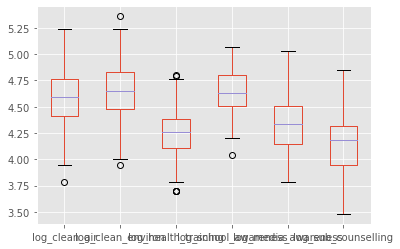

In [297]:
boxplot = df_no_6.boxplot(column=['log_clean_air', 
                                  'log_clean_environ', 
                                  'log_health_training', 
                                  'log_school_awareness',
                                  'log_media_awareness', 
                                  'log_sub_counselling'])

In [298]:
# subset the data
obesity_rate_budgets = df_no_6.loc[:,['obesity_rates_new', 'log_clean_air', 'log_clean_environ', 'log_health_training', 'log_school_awareness', 'log_media_awareness', 'log_sub_counselling']]

In [320]:
# build the model.
# Note that we use this equation to formalute the regression model
# the left-hand side is the y variable and right-hand side is the x variables

model_obesity_rate = sm.formula.ols('obesity_rates_new ~ log_clean_air + log_clean_environ + log_health_training + log_school_awareness + log_media_awareness + log_sub_counselling', obesity_rate_budgets).fit()
model_obesity_rate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      obesity_rates_new   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.525
Date:                Sun, 14 Nov 2021   Prob (F-statistic):              0.177
Time:                        18:04:47   Log-Likelihood:                 612.24
No. Observations:                 117   AIC:                            -1210.
Df Residuals:                     110   BIC:                            -1191.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0049      0.003     -1.529      0.129      -0.011       0.001
log_clean_air            0.0002      0.001      0.419      0.676      -0.001       0.001
log_clean_environ        0.0003      0.001      0.507      0.613      -0.001       0.001
log_health_training      0.0006      0.001      1.023      0.309      -0.001       0.002
log_school_awareness     0.0005      0.001      0.715      0.476      -0.001       0.002
log_media_awareness      0.0008      0.001      1.447      0.151      -0.000       0.002
log_sub_counselling     -0.0006      0.001     -0.893      0.374      -0.002       0.001
==============================================================================
Omnibus:                       27.998   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.925
Skew:                           1.180   Prob(JB):                     1.30e-09
Kurtosis:                       4.681   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [321]:
obesity_rate_budgets_new = drop_column_using_vif_(obesity_rate_budgets.drop('obesity_rates_new', axis=1))

In [322]:
obesity_rate_budgets.columns

Index(['obesity_rates_new', 'log_clean_air', 'log_clean_environ',
       'log_health_training', 'log_school_awareness', 'log_media_awareness',
       'log_sub_counselling'],
      dtype='object')

In [323]:
# using VIF on the bike_rental dataset
df_predictors_selected_VIF = drop_column_using_vif_(obesity_rate_budgets.drop('obesity_rates_new', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['log_clean_air', 'log_clean_environ', 'log_health_training',
       'log_school_awareness', 'log_media_awareness', 'log_sub_counselling'],
      dtype='object')


In [324]:
model_obesity_rate = sm.OLS(endog=obesity_rate_budgets[['obesity_rates_new']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_obesity_rate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      obesity_rates_new   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.525
Date:                Sun, 14 Nov 2021   Prob (F-statistic):              0.177
Time:                        18:05:12   Log-Likelihood:                 612.24
No. Observations:                 117   AIC:                            -1210.
Df Residuals:                     110   BIC:                            -1191.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0049      0.003     -1.529      0.129      -0.011       0.001
log_clean_air            0.0002      0.001      0.419      0.676      -0.001       0.001
log_clean_environ        0.0003      0.001      0.507      0.613      -0.001       0.001
log_health_training      0.0006      0.001      1.023      0.309      -0.001       0.002
log_school_awareness     0.0005      0.001      0.715      0.476      -0.001       0.002
log_media_awareness      0.0008      0.001      1.447      0.151      -0.000       0.002
log_sub_counselling     -0.0006      0.001     -0.893      0.374      -0.002       0.001
==============================================================================
Omnibus:                       27.998   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.925
Skew:                           1.180   Prob(JB):                     1.30e-09
Kurtosis:                       4.681   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

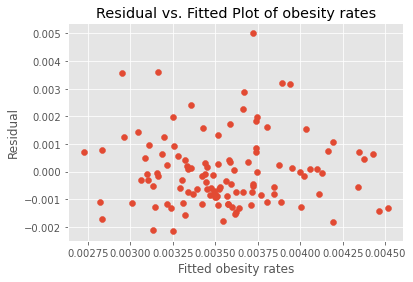

In [325]:
# plot 
plt.scatter(model_obesity_rate.fittedvalues, model_obesity_rate.resid)
# adding title and labels
plt.xlabel('Fitted obesity rates')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity rates')
plt.show()